# 逻辑回归解决多分类问题

手写数字识别，y 分为 10 个类别，用逻辑回归来解决，则需要设置 10 个分类器。

每个分类器判别是这个数字的概率。

### 1.读取数据

使用 scipy.io 的 loadmat 方法读取 .mat 数据文件。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
data = sio.loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

以字典格式存储，{ 'key' : value }

In [3]:
type(data)

dict

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
raw_X = data['X']
raw_y = data['y']

In [6]:
print(raw_X.shape, raw_y.shape)

(5000, 400) (5000, 1)


X 是20×20的图片，展开成 400 维的向量。

In [7]:
def plot_an_img(X):
    pick_one = np.random.randint(5000)
    img = X[pick_one, :]
    
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.imshow(img.reshape(20, 20).T, cmap = 'gray_r')   # 还原成图片维度
    
    plt.xticks([])  # 去掉刻度
    plt.yticks([])
    plt.show

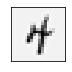

In [8]:
plot_an_img(raw_X)

In [9]:
def plot_100_img(X):
    sample_index = np.random.choice(len(X), 100)
    imgs = X[sample_index, :]
    print(imgs.shape)
    
    fig, ax = plt.subplots(ncols = 10, nrows = 10, figsize = (8, 8), sharex = True, sharey = True)
    
    for i in range(10):
        for j in range(10):
            ax[i, j].imshow(imgs[10 * i + j].reshape(20, 20).T, cmap = 'gray_r')
    
    plt.xticks([])  # 去掉刻度
    plt.yticks([])
    plt.show

(100, 400)


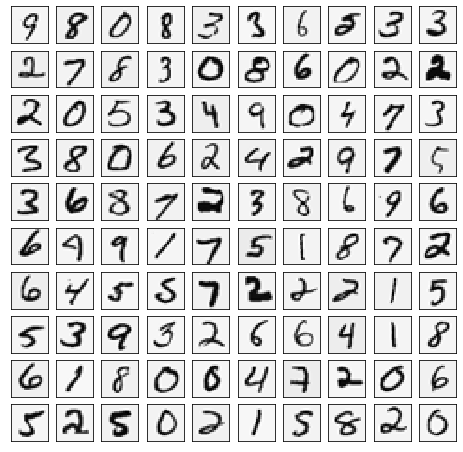

In [10]:
plot_100_img(raw_X)

### 2.梯度下降

这次不使用自己写的梯度下降函数，而是使用 scipy 库的函数进行优化。

$$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

代价函数：
$$J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{\Bigg[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)\Bigg]} + \frac{\lambda}{2m}\sum^n_{j=1}\theta^2_j$$

In [12]:
def costFuntion(theta, X, y, learningrate):
    A = sigmoid(X @ theta)
    
    first = y * np.log(A)
    second = (1 - y) * np.log(1 - A)
    
#    reg = np.sum(np.power(theta[1:], 2)) * (learningrate / (2 * len(X)))
#    theta 从二维[n, 1]变成一维[n, ]，正则化项需要改写。
    reg = theta[1:] @ theta[1:] * (learningrate / (2 * len(X)))
    return -np.sum(first + second) / len(X) + reg

这是原梯度下降函数，本节我们从中找出梯度向量，传递给优化函数。
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

```
def gradientDescent(X, y, theta, alpha, iters, learningrate):
    costs = []
    
    for i in range(iters):
        reg = theta[1:] * (learningrate / len(X))
        reg = np.insert(reg, 0, values=0, axis=0)
        
        error = sigmoid(X @ theta) - y
        theta = theta - (X.T @ error) * alpha / len(X) - reg
        cost = costFuntion(theta, X, y, learningrate)
        costs.append(cost)
        
        if  i % 1000 == 0:
            print(cost)
            
    return theta, costs
```

In [13]:
def gradient_reg(theta, X, y, lr):
    reg = theta[1:] * (lr / len(X))
    reg = np.insert(reg, 0, values=0, axis=0)
    
    error = sigmoid(X @ theta) - y
    first = (X.T @ error) / len(X)
    
    return first + reg

X 加一列 1，y 从二维数组改成一维数组。

In [14]:
X = np.insert(raw_X, 0, values=1, axis=1)
X.shape

(5000, 401)

In [15]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [16]:
y = raw_y.flatten()
y.shape

(5000,)

In [17]:
raw_y, y

(array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8),
 array([10, 10, 10, ...,  9,  9,  9], dtype=uint8))

使用 scipy 的库函数来进行梯度下降

In [18]:
from scipy.optimize import minimize

In [19]:
def one_vs_all(X, y, lr, K):
    n = X.shape[1]
    
    theta_all = np.zeros((K, n))    # 十个分类器，总的参数矩阵
    
    for i in range(1, K+1):
        theta_i = np.zeros(n, )     # 每个分类器的参数都是一个一维数组。
        
        result = minimize(fun=costFuntion, 
                          x0=theta_i, 
                          args=(X, y==i, lr),
                          method='TNC',
                          jac=gradient_reg)
        
        theta_all[i-1, :] = result.x     # 保存优化好的参数
    
    return theta_all

In [20]:
lr = 1
K = 10

In [21]:
theta_final = one_vs_all(X, y, lr, K)

In [22]:
 theta_final, theta_final.shape

(array([[-2.38187334e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.30433279e-03, -7.29580949e-10,  0.00000000e+00],
        [-3.18303389e+00,  0.00000000e+00,  0.00000000e+00, ...,
          4.46340729e-03, -5.08870029e-04,  0.00000000e+00],
        [-4.79638233e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -2.87468695e-05, -2.47395863e-07,  0.00000000e+00],
        ...,
        [-7.98700752e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -8.94576566e-05,  7.21256372e-06,  0.00000000e+00],
        [-4.57358931e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.33390955e-03,  9.96868542e-05,  0.00000000e+00],
        [-5.40542751e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.16613537e-04,  7.88124085e-06,  0.00000000e+00]]),
 (10, 401))

### 3.使用优化出的参数做预测

In [23]:
def predict(X, theta_final):
    h = sigmoid(X @ theta_final.T) # X:(5000, 401), theta_final:(10, 401)  ==> (5000, 10)
    
    h_argmax = np.argmax(h, axis=1)  # 返回每行最大值的索引

    return h_argmax + 1    # 索引跟标签数字相对应

In [24]:
y_pred = predict(X, theta_final)

In [25]:
acc = np.mean(y_pred == y)
acc

0.9446